# Erzeugung eines W-Zustands

Das Programm definiert eine Schaltung zur Erzeugung des W-Zustands

$$ |\Psi \rangle = \frac{1}{\sqrt{3}} \Big( |001\rangle + |010\rangle + |100\rangle \Big) $$

und führt eine Simulation aus.

In [1]:
# import qiskit stuff
import qiskit
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import QuantumCircuit,Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

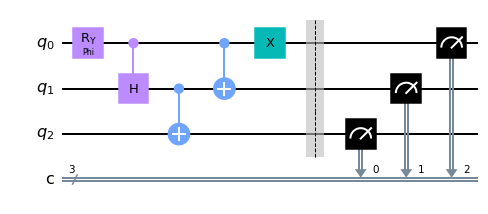

In [2]:
# Definition eines freien Parameters
phi = Parameter('Phi')

# Definition des Schaltkreis
circuit = QuantumCircuit(3,3)

circuit.ry(phi,0)  # phi ist freier Parameter
circuit.ch(0, 1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.x(0)
circuit.barrier()
circuit.measure([2,1,0],[0,1,2]) # Vertausche die Messreihenfolge
circuit.draw('mpl')

In [3]:
# Binde Parameter
circuit = circuit.bind_parameters({phi: 2*np.arccos( 1/np.sqrt(3) )})

{'010': 340, '001': 334, '100': 326}


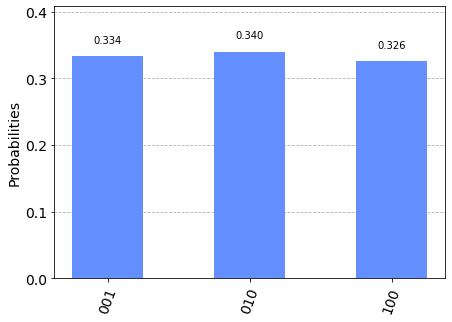

In [4]:
# Ausführen einer Simulation
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=10000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)